<a href="https://colab.research.google.com/github/wonkwonlee/likelion-k-digital-training-AI/blob/main/Artificial-Intelligence/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 시퀸스 예측 모델: [0.0, 0.1, 0.2, 0.3] 이라는 연속된 숫자가 주어졌을 때 [0.4]를 예측하는 신경망

import tensorflow as tf
import numpy as np

# 시퀀스 예측 데이터 생성 
X = []
Y = []
for i in range(6):
  # [0,1,2,3], [1,2,3,4] 같은 정수의 시퀸스
  lst = list(range(i,i+4))

  # 시퀸스를 각 10으로 나눔
  # SimpleRNN 에 각 타임스텝에 하나씩 숫자가 들어가기 때문에 하나씩 분리해서 배열에 저장
  X.append(list(map(lambda c: [c/10], lst)))
  # 정답을 10으로 나눠서 저장
  Y.append((i+4)/10)

X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X, Y, epochs=100, verbose=0) 
model.save('simple_rnn_1.h5') 
print(model.predict(X))

[[0.44798857]
 [0.5371386 ]
 [0.621542  ]
 [0.7006974 ]
 [0.7749436 ]
 [0.84507906]]


In [13]:
# 학습 과정에서 본 적이 없는 테스트 데이터 입력
print(model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]]))) 
print(model.predict(np.array([[[-0.1],[0.0],[0.1],[0.2]]])))

[[0.9120264]]
[[0.35565808]]


In [ ]:
# LSTM 실험 - 곱셈 문제

X = []
Y = []
for i in range(3000):
  # 0~1 사이의 랜덤한 숫자 100 개를 만듭니다. 
  lst = np.random.rand(100)
  #print(lst)
  # 마킹할 숫자 2개의 인덱스를 뽑습니다.
  idx = np.random.choice(100, 2, replace=False) 
  #print(idx)
  # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다. 
  zeros = np.zeros(100)
  #print(zeros)
  zeros[idx] = 1
  #print(zeros)
  # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X 에 저장합니다. 
  X.append(np.array(list(zip(zeros, lst)))) 
  #print(X)
  # 마킹 인덱스가 1인 값들만 서로 곱해서 Y 에 저장합니다. 
  Y.append(np.prod(lst[idx]))
  #print(Y)

print(X[0], Y[0])

In [18]:
# SimpleRNN 레이어를 사용한 곱셈 문제 모델 정의 
model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]), 
        tf.keras.layers.SimpleRNN(units=30),
        tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse') 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# SimpleRNN 네트워크 학습
X = np.array(X)
Y = np.array(Y)
# 2560개의 데이터만 학습, validation 데이터는 20% 로 지정합
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

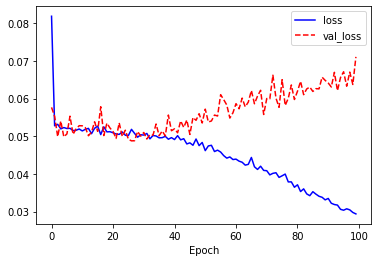

In [20]:
# SimpleRNN 네트워크 학습 결과 확인
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'], 'b-', label='loss') 
plt.plot(history.history['val_loss'], 'r--', label='val_loss') 
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [21]:
# Test 데이터에 대한 예측 정확도 확인 
model.evaluate(X[2560:], Y[2560:]) 
prediction = model.predict(X[2560:2560+5]) 
# 5개 테스트 데이터에 대한 예측 확인 (오차 0.04)
for i in range(5):
  print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))

# 논문과 동일하게 오차가 0.04 이상이면 오답 처리
prediction = model.predict(X[2560:]) 
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - Y[2560+i]) > 0.04:
    fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

14/14 [==============================] - 0s 10ms/step - loss: 0.0633
0.08762021765390386 	 0.118496545 	diff: 0.030876327005233864
0.0604481840913088 	 0.30627292 	diff: 0.2458247398550718
0.3365305196102409 	 0.6390184 	diff: 0.30248789679448324
0.07004657349258536 	 0.11948655 	diff: 0.049439974513949214
0.28404793788535415 	 -0.006010276 	diff: 0.29005821368513524
correctness: 10.909090909090908 %


In [2]:
# LSTM 곱셈 문제

import tensorflow as tf
import numpy as np

X = []
Y = []
for i in range(3000):
  lst = np.random.rand(100)
  idx = np.random.choice(100, 2, replace=False) 
  zeros = np.zeros(100)
  zeros[idx] = 1
  X.append(np.array(list(zip(zeros, lst)))) 
  Y.append(np.prod(lst[idx]))

#LSTM 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
        tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]), 
        tf.keras.layers.LSTM(units=30),
        tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse') 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 30)           3960      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# LSTM 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

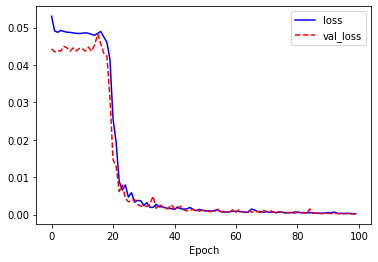

In [4]:
# LSTM 네트워크 학습 결과 확인
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'], 'b-', label='loss') 
plt.plot(history.history['val_loss'], 'r--', label='val_loss') 
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [5]:
#Test 데이터에 대한 예측 정확도 확인 
model.evaluate(X[2560:], Y[2560:]) 
prediction = model.predict(X[2560:2560+5]) 
for i in range(5):
  print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))

prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - Y[2560+i]) > 0.04: 
    cnt += 1

print('correctness:', (440 - cnt) / 440 * 100, '%')

14/14 [==============================] - 1s 7ms/step - loss: 1.9984e-04
0.01729577757378255 	 0.0782948 	diff: 0.060999021158021347
0.28328026989406224 	 0.28015524 	diff: 0.0031250284046518417
0.03173832951157406 	 0.029056024 	diff: 0.0026823057052405147
0.06055874572030356 	 0.059660625 	diff: 0.0008981210075979448
0.3468460626742874 	 0.3457283 	diff: 0.0011177547118698117
correctness: 97.95454545454545 %


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Bidirectional, LSTM

model = Sequential()
model.add(Bidirectional(LSTM(30, return_sequences=True), input_shape=[100, 2])) 
model.add(Bidirectional(LSTM(30)))
model.add(Dense(1))
model.compile(loss='mse', optimizer = 'adam')
model.summary()

X = np.array(X)
Y = np.array(Y)
history = model.fit(X, Y, epochs=100, verbose=1, validation_split= 0.2)


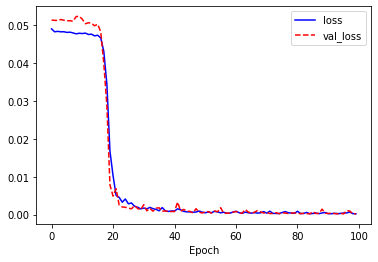

In [7]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'], 'b-', label='loss') 
plt.plot(history.history['val_loss'], 'r--', label='val_loss') 
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [8]:
model.evaluate(X[2560:], Y[2560:]) 
prediction = model.predict(X[2560:2560+5]) 
for i in range(5):
  print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))

prediction = model.predict(X[2560:]) 
cnt = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - Y[2560+i]) > 0.04: 
    cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

14/14 [==============================] - 0s 12ms/step - loss: 2.1717e-04
0.01729577757378255 	 0.12080736 	diff: 0.1035115795586523
0.28328026989406224 	 0.28772375 	diff: 0.004443479981960097
0.03173832951157406 	 0.029936505 	diff: 0.0018018240299732952
0.06055874572030356 	 0.067516536 	diff: 0.006957789800250032
0.3468460626742874 	 0.34788334 	diff: 0.001037281022306824
correctness: 97.04545454545455 %
